In [ ]:
import duckdb
import pandas as pd
from google.cloud import storage
from google.colab import auth
auth.authenticate_user()


ganancias
semillas
               Envios   gan_acum
Fuente                          
interpolacion   11310  111510000
media           10630  119910000
mediana         10450  115290000
null            10900  119700000
original        10310  125230000
semillerio
               Envios   gan_acum
Fuente                          
interpolacion   10620  120820000
media           11630  130270000
mediana         10160  126000000
null            10850  131810000
original        12200  130760000
sin semillerío


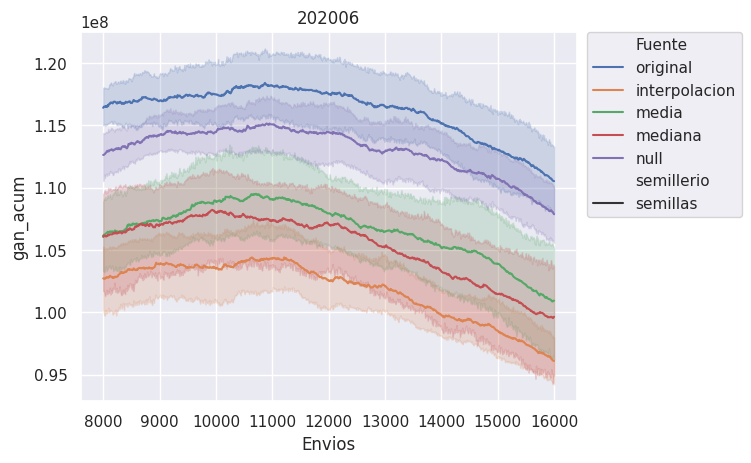

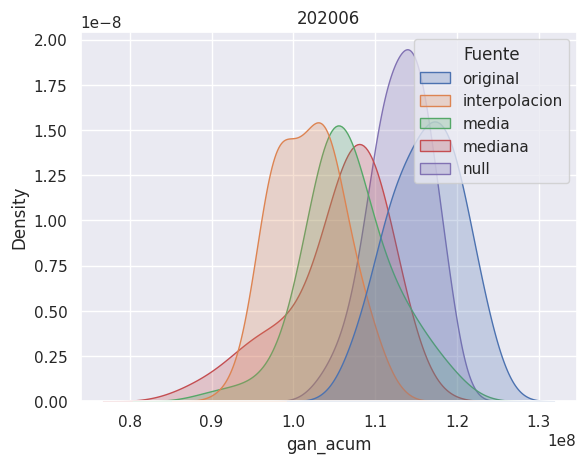

con semillerío
               Envios   gan_acum
Fuente                          
interpolacion   11310  111510000
media           10630  119910000
mediana         10450  115290000
null            10900  119700000
original        10310  125230000
sin semillerío


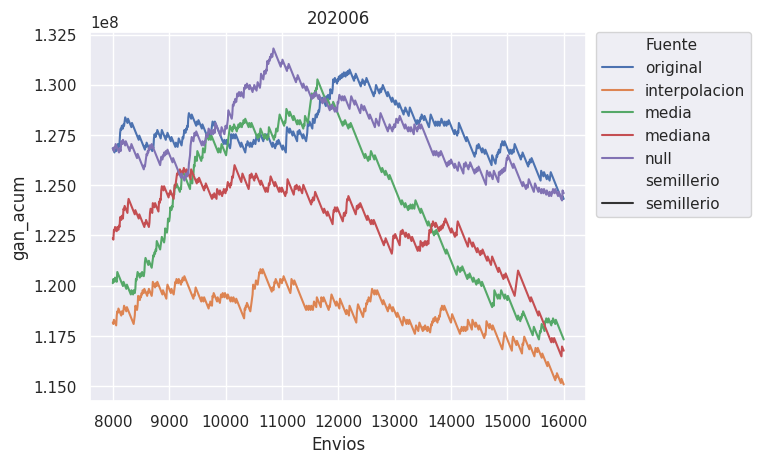

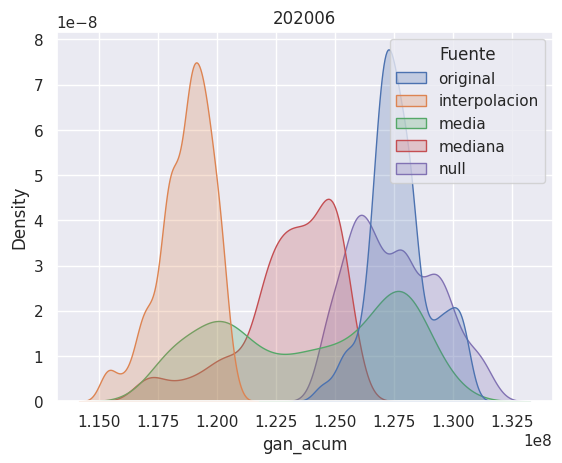

In [ ]:
mes = '202006'
ct_0_GananciasSemillas = pd.read_csv('gs://buk-tlsssr-dmeyf/exp/exp_col_2_202006/tb_entrega_lista_ct_0_GananciasSemillas.csv')
ct_arbitraria_GananciasSemillas = pd.read_csv("gs://buk-tlsssr-dmeyf/exp/exp_col_2_202006/tb_entrega_lista_ct_arbitraria_GananciasSemillas.csv")
ct_it_GananciasSemillas = pd.read_csv("gs://buk-tlsssr-dmeyf/exp/exp_col_2_202006/tb_entrega_lista_ct_it_GananciasSemillas.csv")
ct_mean_6m_GananciasSemillas = pd.read_csv("gs://buk-tlsssr-dmeyf/exp/exp_col_2_202006/tb_entrega_lista_ct_mean_6m_GananciasSemillas.csv")
ct_median_6m_GananciasSemillas = pd.read_csv("gs://buk-tlsssr-dmeyf/exp/exp_col_2_202006/tb_entrega_lista_ct_median_6m_GananciasSemillas.csv")
ct_null_6m_GananciasSemillas = pd.read_csv("gs://buk-tlsssr-dmeyf/exp/exp_col_2_202006/tb_entrega_lista_ct_nulls_GananciasSemillas.csv")

ct_0_GananciasSemillas['Fuente'] = 'original'
ct_arbitraria_GananciasSemillas['Fuente'] = 'arbitraria'
ct_it_GananciasSemillas['Fuente'] = 'interpolacion'
ct_mean_6m_GananciasSemillas['Fuente'] = 'media'
ct_median_6m_GananciasSemillas['Fuente'] = 'mediana'
ct_null_6m_GananciasSemillas['Fuente'] = 'null'

combined_df = pd.concat([ct_0_GananciasSemillas, ct_it_GananciasSemillas, ct_mean_6m_GananciasSemillas, ct_median_6m_GananciasSemillas,ct_null_6m_GananciasSemillas], ignore_index=True)
combined_df['semillerio'] = combined_df['Modelo'].apply(lambda x: "semillerio" if x == 9 else "semillas")

import seaborn as sns
import matplotlib.pyplot as plt
mes = '202006'
print("ganancias")
print("semillas")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("semillerio")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillerio"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])

print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillas"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillas"], x="gan_acum", hue="Fuente",bw_adjust=3, fill=True)
plt.title(f'{mes}')
plt.show()
print("con semillerío")

maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillerio"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillerio"], x="gan_acum", hue="Fuente",bw_adjust=1, fill=True)
plt.title(f'{mes}')
plt.show()


ganancias
semillas
               Envios   gan_acum
Fuente                          
interpolacion    9450  129570000
media            9450  108010000
mediana         11100  121380000
null            10440  132160000
original         9800  131880000
semillerio
               Envios   gan_acum
Fuente                          
interpolacion   10200  137760000
media           11980  112140000
mediana         10850  124810000
null             8070  137270000
original        10490  137130000
sin semillerío


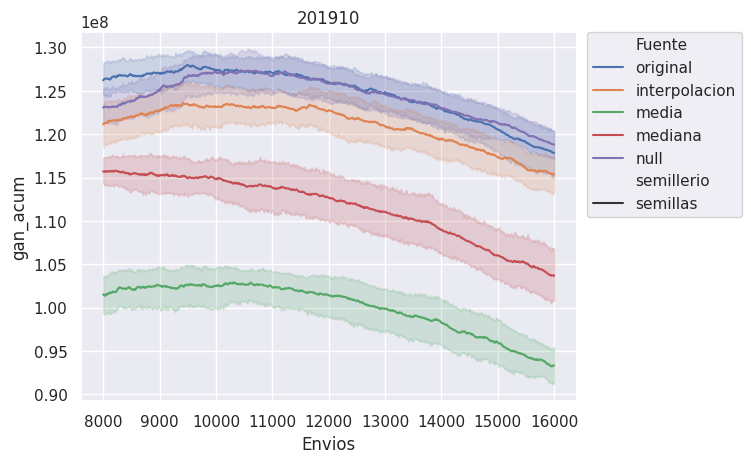

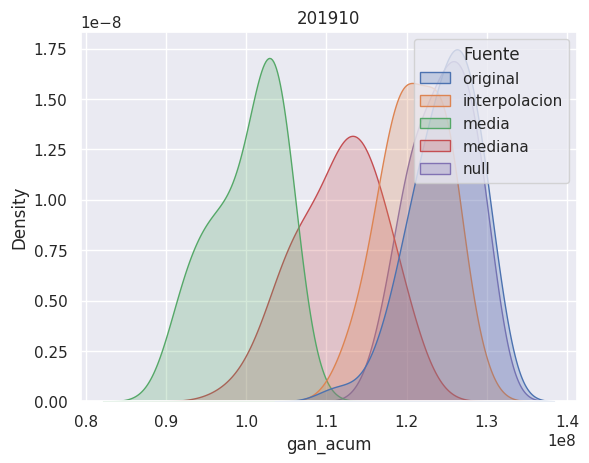

con semillerío
               Envios   gan_acum
Fuente                          
interpolacion    9450  129570000
media            9450  108010000
mediana         11100  121380000
null            10440  132160000
original         9800  131880000
sin semillerío


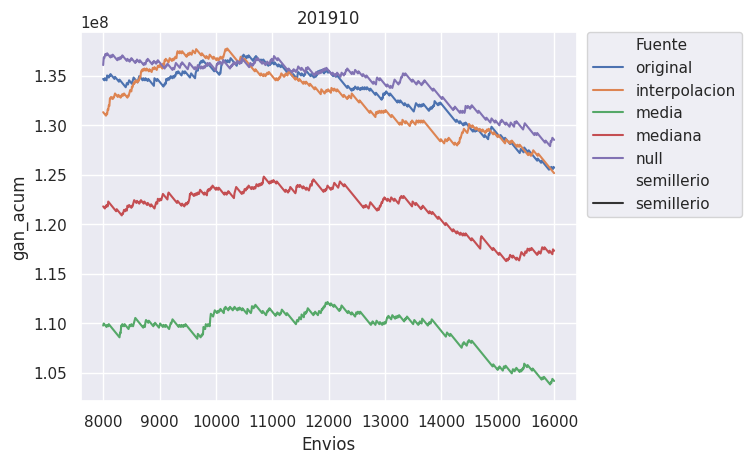

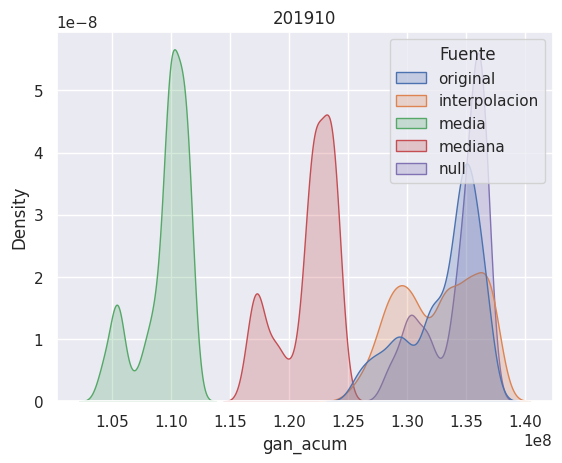

In [ ]:
exp = "exp_col_2_201910"
ct_0_GananciasSemillas = pd.read_csv(f'gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_0_GananciasSemillas.csv')
ct_arbitraria_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_arbitraria_GananciasSemillas.csv")
ct_it_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_it_GananciasSemillas.csv")
ct_mean_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_mean_6m_GananciasSemillas.csv")
ct_median_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_median_6m_GananciasSemillas.csv")
ct_null_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_nulls_GananciasSemillas.csv")

ct_0_GananciasSemillas['Fuente'] = 'original'
ct_arbitraria_GananciasSemillas['Fuente'] = 'arbitraria'
ct_it_GananciasSemillas['Fuente'] = 'interpolacion'
ct_mean_6m_GananciasSemillas['Fuente'] = 'media'
ct_median_6m_GananciasSemillas['Fuente'] = 'mediana'
ct_null_6m_GananciasSemillas['Fuente'] = 'null'

combined_df = pd.concat([ct_0_GananciasSemillas, ct_it_GananciasSemillas, ct_mean_6m_GananciasSemillas, ct_median_6m_GananciasSemillas,ct_null_6m_GananciasSemillas], ignore_index=True)
combined_df['semillerio'] = combined_df['Modelo'].apply(lambda x: "semillerio" if x == 9 else "semillas")


import seaborn as sns
import matplotlib.pyplot as plt
mes = '201910'
print("ganancias")
print("semillas")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("semillerio")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillerio"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])

print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillas"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillas"], x="gan_acum", hue="Fuente",bw_adjust=3, fill=True)
plt.title(f'{mes}')
plt.show()
print("con semillerío")

maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillerio"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillerio"], x="gan_acum", hue="Fuente",bw_adjust=1, fill=True)
plt.title(f'{mes}')
plt.show()

ganancias
semillas
               Envios   gan_acum
Fuente                          
interpolacion   12800  116480000
media           11430  114590000
mediana         11210  124530000
null            11280  119280000
original        13360  115080000
semillerio
               Envios   gan_acum
Fuente                          
interpolacion   11230  125790000
media           13010  123970000
mediana         10430  130830000
null            13160  132160000
original        12350  124670000
sin semillerío


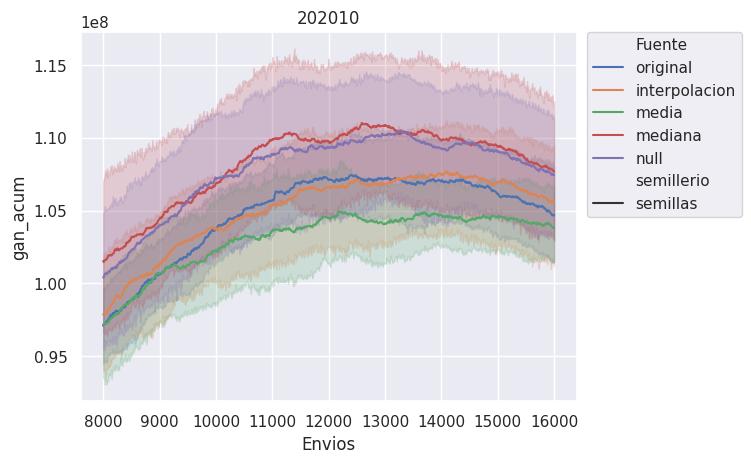

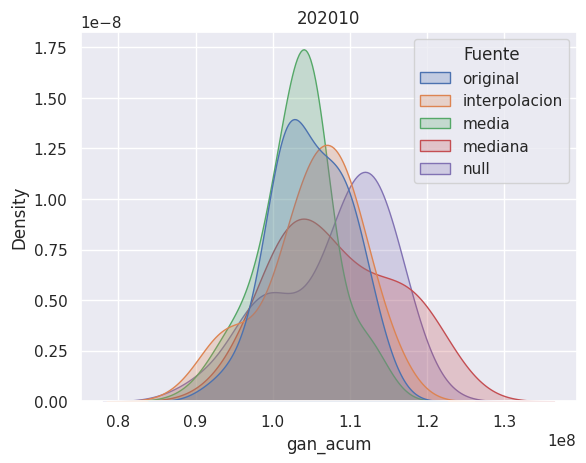

con semillerío
               Envios   gan_acum
Fuente                          
interpolacion   12800  116480000
media           11430  114590000
mediana         11210  124530000
null            11280  119280000
original        13360  115080000
sin semillerío


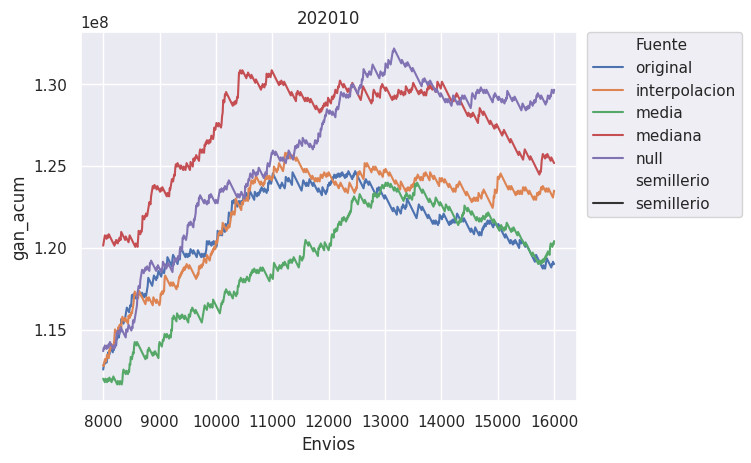

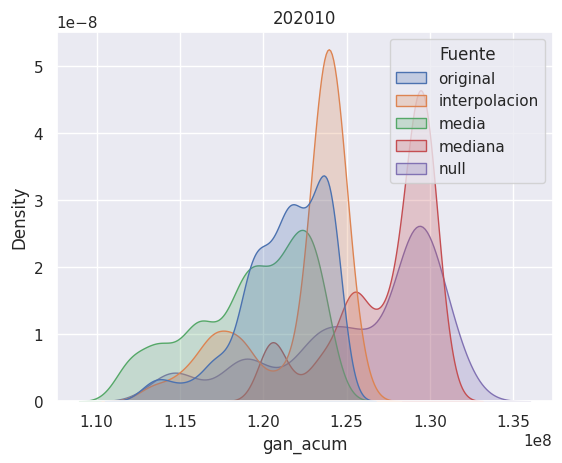

In [ ]:
exp = "exp_col_2_202010"
ct_0_GananciasSemillas = pd.read_csv(f'gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_0_GananciasSemillas.csv')
ct_arbitraria_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_arbitraria_GananciasSemillas.csv")
ct_it_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_it_GananciasSemillas.csv")
ct_mean_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_mean_6m_GananciasSemillas.csv")
ct_median_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_median_6m_GananciasSemillas.csv")
ct_null_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_nulls_GananciasSemillas.csv")

ct_0_GananciasSemillas['Fuente'] = 'original'
ct_arbitraria_GananciasSemillas['Fuente'] = 'arbitraria'
ct_it_GananciasSemillas['Fuente'] = 'interpolacion'
ct_mean_6m_GananciasSemillas['Fuente'] = 'media'
ct_median_6m_GananciasSemillas['Fuente'] = 'mediana'
ct_null_6m_GananciasSemillas['Fuente'] = 'null'

combined_df = pd.concat([ct_0_GananciasSemillas, ct_it_GananciasSemillas, ct_mean_6m_GananciasSemillas, ct_median_6m_GananciasSemillas,ct_null_6m_GananciasSemillas], ignore_index=True)
combined_df['semillerio'] = combined_df['Modelo'].apply(lambda x: "semillerio" if x == 9 else "semillas")


import seaborn as sns
import matplotlib.pyplot as plt
mes = '202010'
print("ganancias")
print("semillas")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("semillerio")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillerio"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])

print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillas"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillas"], x="gan_acum", hue="Fuente",bw_adjust=3, fill=True)
plt.title(f'{mes}')
plt.show()
print("con semillerío")

maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillerio"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillerio"], x="gan_acum", hue="Fuente",bw_adjust=1, fill=True)
plt.title(f'{mes}')
plt.show()



ganancias
semillas
               Envios   gan_acum
Fuente                          
interpolacion   13800  126000000
media           15370  120610000
mediana         15940  121940000
null            14240  118720000
original        12690  121730000
semillerio
               Envios   gan_acum
Fuente                          
interpolacion   13470  131110000
media           14570  131810000
mediana         12730  129290000
null            12560  131320000
original        13810  128730000
sin semillerío


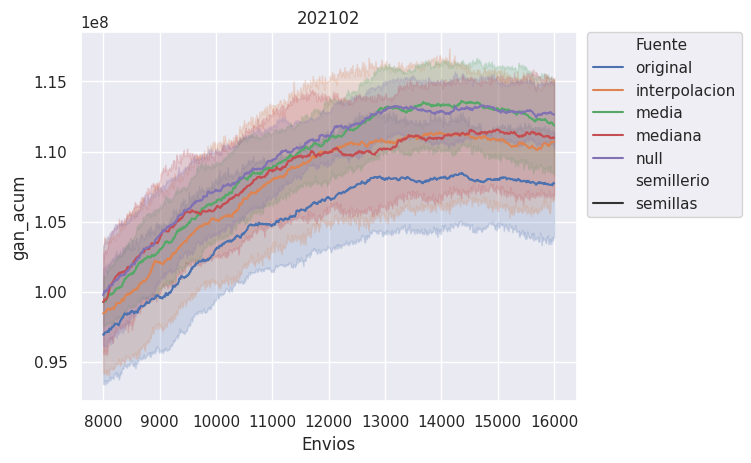

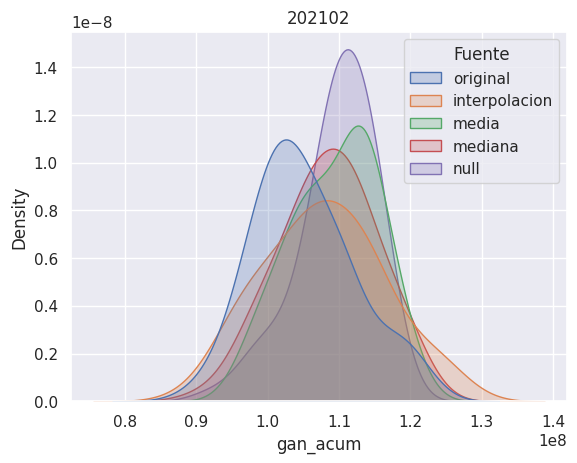

con semillerío
               Envios   gan_acum
Fuente                          
interpolacion   13800  126000000
media           15370  120610000
mediana         15940  121940000
null            14240  118720000
original        12690  121730000
sin semillerío


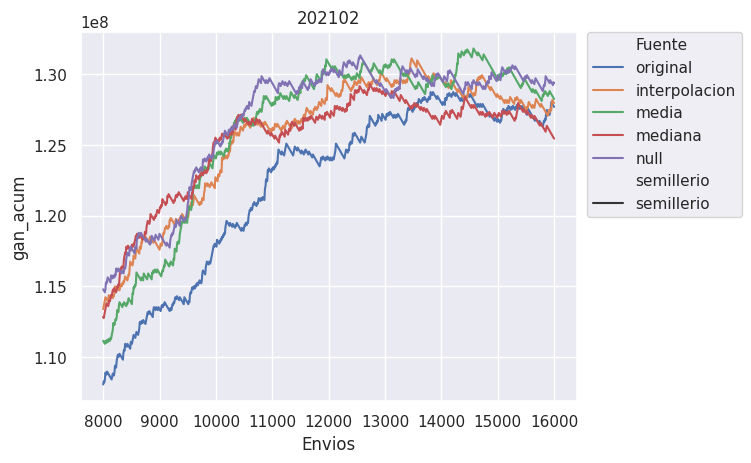

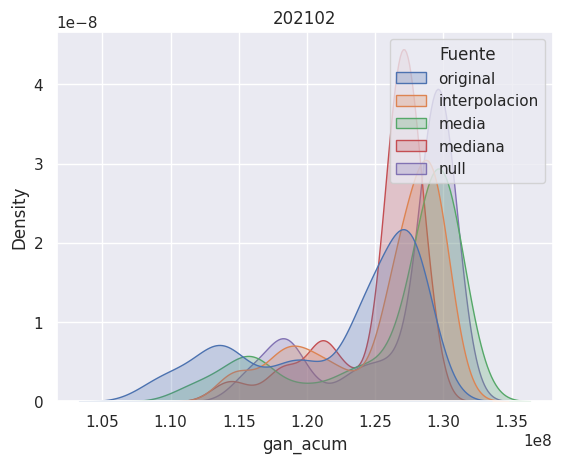

In [ ]:
exp = "exp_col_2_202102"
ct_0_GananciasSemillas = pd.read_csv(f'gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_0_GananciasSemillas.csv')
ct_arbitraria_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_arbitraria_GananciasSemillas.csv")
ct_it_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_it_GananciasSemillas.csv")
ct_mean_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_mean_6m_GananciasSemillas.csv")
ct_median_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_median_6m_GananciasSemillas.csv")
ct_null_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_nulls_GananciasSemillas.csv")

ct_0_GananciasSemillas['Fuente'] = 'original'
ct_arbitraria_GananciasSemillas['Fuente'] = 'arbitraria'
ct_it_GananciasSemillas['Fuente'] = 'interpolacion'
ct_mean_6m_GananciasSemillas['Fuente'] = 'media'
ct_median_6m_GananciasSemillas['Fuente'] = 'mediana'
ct_null_6m_GananciasSemillas['Fuente'] = 'null'

combined_df = pd.concat([ct_0_GananciasSemillas, ct_it_GananciasSemillas, ct_mean_6m_GananciasSemillas, ct_median_6m_GananciasSemillas,ct_null_6m_GananciasSemillas], ignore_index=True)
combined_df['semillerio'] = combined_df['Modelo'].apply(lambda x: "semillerio" if x == 9 else "semillas")


import seaborn as sns
import matplotlib.pyplot as plt
mes = '202102'
print("ganancias")
print("semillas")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("semillerio")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillerio"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])

print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillas"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillas"], x="gan_acum", hue="Fuente",bw_adjust=3, fill=True)
plt.title(f'{mes}')
plt.show()
print("con semillerío")

maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillerio"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillerio"], x="gan_acum", hue="Fuente",bw_adjust=1, fill=True)
plt.title(f'{mes}')
plt.show()

ganancias
semillas
               Envios   gan_acum
Fuente                          
interpolacion   10460  130340000
media           13660  129500000
mediana         10760  132440000
null            12130  123970000
original        10280  130480000
semillerio
               Envios   gan_acum
Fuente                          
interpolacion   10240  154000000
media           12880  158760000
mediana         12620  158620000
null            12180  159460000
original        12810  158970000
sin semillerío


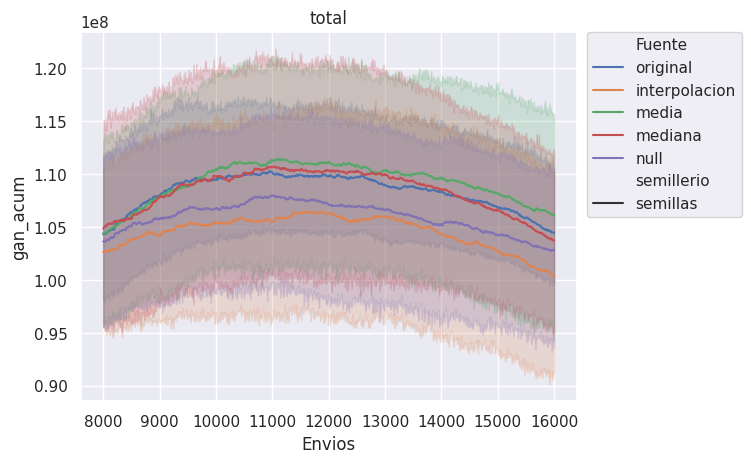

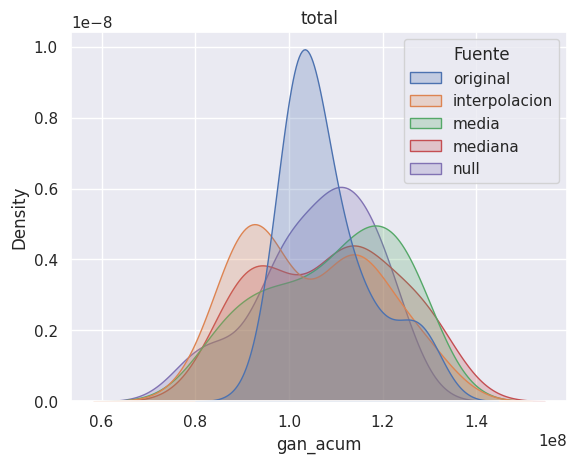

con semillerío
               Envios   gan_acum
Fuente                          
interpolacion   10460  130340000
media           13660  129500000
mediana         10760  132440000
null            12130  123970000
original        10280  130480000
sin semillerío


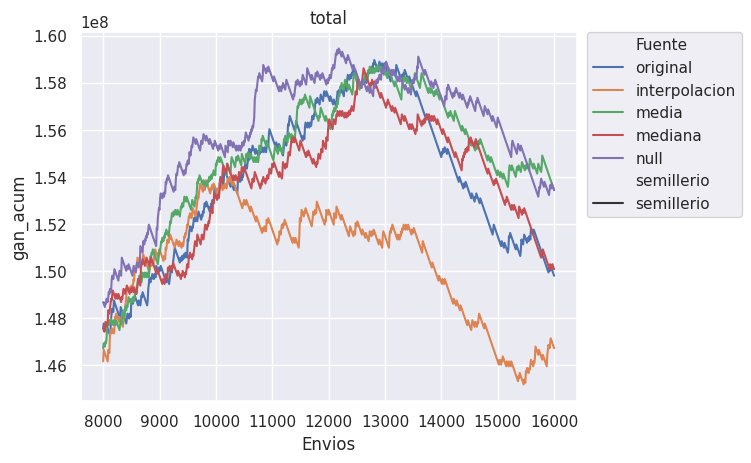

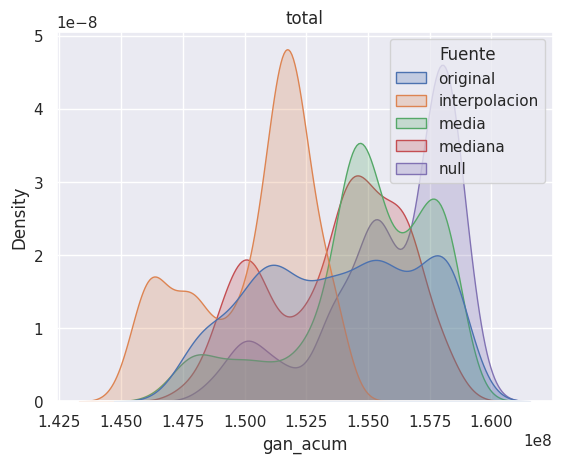

In [ ]:
exp = "exp_col_2_total"
ct_0_GananciasSemillas = pd.read_csv(f'gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_0_GananciasSemillas.csv')
ct_arbitraria_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_arbitraria_GananciasSemillas.csv")
ct_it_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_it_GananciasSemillas.csv")
ct_mean_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_mean_6m_GananciasSemillas.csv")
ct_median_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_median_6m_GananciasSemillas.csv")
ct_null_6m_GananciasSemillas = pd.read_csv(f"gs://buk-tlsssr-dmeyf/exp/{exp}/tb_entrega_lista_ct_nulls_GananciasSemillas.csv")

ct_0_GananciasSemillas['Fuente'] = 'original'
ct_arbitraria_GananciasSemillas['Fuente'] = 'arbitraria'
ct_it_GananciasSemillas['Fuente'] = 'interpolacion'
ct_mean_6m_GananciasSemillas['Fuente'] = 'media'
ct_median_6m_GananciasSemillas['Fuente'] = 'mediana'
ct_null_6m_GananciasSemillas['Fuente'] = 'null'

combined_df = pd.concat([ct_0_GananciasSemillas, ct_it_GananciasSemillas, ct_mean_6m_GananciasSemillas, ct_median_6m_GananciasSemillas,ct_null_6m_GananciasSemillas], ignore_index=True)
combined_df['semillerio'] = combined_df['Modelo'].apply(lambda x: "semillerio" if x == 9 else "semillas")


import seaborn as sns
import matplotlib.pyplot as plt
mes = 'total'
print("ganancias")
print("semillas")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("semillerio")
maximos_por_modelo = combined_df[combined_df.semillerio== "semillerio"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])

print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillas"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillas"], x="gan_acum", hue="Fuente",bw_adjust=3, fill=True)
plt.title(f'{mes}')
plt.show()
print("con semillerío")

maximos_por_modelo = combined_df[combined_df.semillerio== "semillas"].groupby('Fuente').apply(lambda x: x.loc[x['gan_acum'].idxmax()])
print(maximos_por_modelo[['Envios', 'gan_acum']])
print("sin semillerío")

sns.set_theme(style="darkgrid")
sns.lineplot(x="Envios", y="gan_acum",hue='Fuente',style="semillerio",data=combined_df[combined_df.semillerio== "semillerio"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title(f'{mes}')
plt.show()

sns.kdeplot(data=combined_df[combined_df.semillerio== "semillerio"], x="gan_acum", hue="Fuente",bw_adjust=1, fill=True)
plt.title(f'{mes}')
plt.show()